In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

In [2]:
zg_file = '~/downloads/2018_ztf/sci/2018/0504/445139/ztf_2018_zg.fits'
zr_file = '~/downloads/2018_ztf/sci/2018/0504/467847/ztf_2018_zr.fits'

In [3]:
def load_fits(file):
    ''' Load a fits file, print its info, and return its data'''
    with fits.open(file) as foo:
        image = foo[0].data
        info = foo[0].header
        print(info)
    return image

In [4]:
zg_data = load_fits(zg_file)
zg_data

SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                  -32                                                  NAXIS   =                    2                                                  NAXIS1  =                  593                                                  NAXIS2  =                  594                                                  BUNIT   = 'Data Value'                                                          ORIGIN  = 'Zwicky Transient Facility' / Data origin                             OBSERVER= 'ZTF Robotic Observing Software' / Observer                           ROBOSOFT= '0.87  April 17, 2018' / Robotic software version                     FITSSOFT= '0.87  April 17, 2018' / FITS software version                        INSTRUME= 'ZTF/MOSAIC'         / Instrument name                                DETECTOR= '        '           / Detector controller                            DETSOFT = '        '           / Detecto

array([[503.17984, 486.5612 , 484.4076 , ..., 505.5795 , 479.1644 ,
        484.83377],
       [501.67172, 473.01578, 500.17044, ..., 481.67953, 492.0181 ,
        486.2444 ],
       [489.85254, 476.9221 , 485.06015, ..., 497.62207, 492.95316,
        493.05624],
       ...,
       [482.0544 , 499.2236 , 487.47748, ..., 490.42032, 488.4465 ,
        494.99057],
       [494.4181 , 495.3403 , 479.25494, ..., 488.48856, 516.3517 ,
        480.83093],
       [487.40698, 489.24332, 504.6335 , ..., 488.55933, 479.03445,
        501.4171 ]], dtype='>f4')

In [5]:
def plt_fits(image, header):
    '''Plot a .fits file with a specified title'''
    plt.imshow(image)
    plt.colorbar(label= 'counts')
    plt.title(header)

In [6]:
standard_1r = load_fits('~/downloads/standard_1-part1/ztf_20180806463333_000404_zr_c14_o_q2_sciimg_ra58.3052_dec0.2730_asec599.fits')
standard_2r = load_fits('~/downloads/standard_2-part1/ztf_20180806463333_000404_zr_c14_o_q4_sciimg_ra58.9352_dec0.1175_asec599.fits')
standard_3r = load_fits('~/downloads/standard_3-part1/ztf_20180806463333_000404_zr_c14_o_q3_sciimg_ra58.2258_dec0.0052_asec599.fits')
standard_4r = load_fits('~/downloads/standard_4-part1/ztf_20180806441713_000808_zr_c07_o_q2_sciimg_ra29.6004_dec61.8954_asec599.fits')
standard_5r = load_fits('~/downloads/standard_5-part1/ztf_20180806474005_000451_zr_c07_o_q4_sciimg_ra33.0874_dec3.5756_asec599.fits')
standard_1g = load_fits('~/downloads/standard_1-part1/ztf_20180806498843_000404_zg_c14_o_q2_sciimg_ra58.3052_dec0.2730_asec599.fits')
standard_2g = load_fits('~/downloads/standard_2-part1/ztf_20180806498843_000404_zg_c14_o_q4_sciimg_ra58.9352_dec0.1175_asec599.fits')
standard_3g = load_fits('~/downloads/standard_3-part1/ztf_20180806498843_000404_zg_c14_o_q3_sciimg_ra58.2258_dec0.0052_asec599.fits')
standard_4g = load_fits('~/downloads/standard_4-part1/ztf_20180806328183_000808_zg_c07_o_q2_sciimg_ra29.6004_dec61.8954_asec599.fits')
standard_5g = load_fits('~/downloads/standard_5-part1/ztf_20180806484525_000451_zg_c07_o_q4_sciimg_ra33.0874_dec3.5756_asec599.fits')

SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                  -32                                                  NAXIS   =                    2                                                  NAXIS1  =                  594                                                  NAXIS2  =                  448                                                  BUNIT   = 'Data Value'                                                          ORIGIN  = 'Zwicky Transient Facility' / Data origin                             OBSERVER= 'ZTF Robotic Observing Software' / Observer                           ROBOSOFT= '0.97  July 30, 2018' / Robotic software version                      FITSSOFT= '0.97  July 30, 2018' / FITS software version                         INSTRUME= 'ZTF/MOSAIC'         / Instrument name                                DETECTOR= '        '           / Detector controller                            DETSOFT = '        '           / Detecto

In [7]:
standard_r = [standard_1r, standard_2r, standard_3r, standard_4r, standard_5r]
standard_g = [standard_1g, standard_2g, standard_3g, standard_4g, standard_5g]

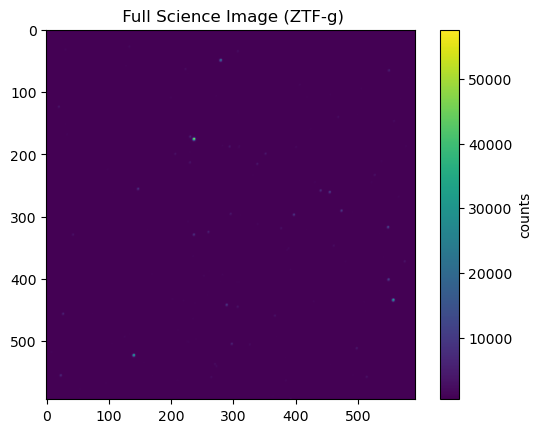

In [177]:
plt_fits(zg_data, ' Full Science Image (ZTF-g)')
plt.savefig('full_image_g')

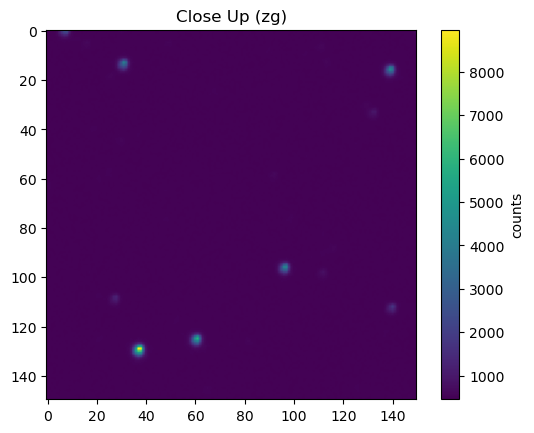

In [9]:
close_upg = zg_data[200:350, 200:350]
plt_fits(close_upg, 'Close Up (zg)')

In [10]:
def peaks(image, peaks_x, peaks_y, threshhold):
    '''Find pixels with peak count values in an image by taking pixels above a specified threshhold and comparing them to their neighboring pixels'''
    for i in range(1, len(image[:,0])-1):
        for j in range(1,len(image[0,:])-1):
            value = image[i,j]
            if value < threshhold:
                continue
            elif (value > image[i+1, j] and image[i, j+1] and image[i, j-1] and image[i-1, j-1] and image[i-1, j+1] and image[i+1, j+1] and image[i+1, j-1] and image[i-1, j]):
                peaks_x.append(i)
                peaks_y.append(j)
    return peaks_x, peaks_y

In [11]:
pks_ig = []
pks_jg = []
data_pksg = peaks(close_upg, pks_ig, pks_jg, 3500)
print(data_pksg)

([13, 16, 16, 96, 96, 125, 125, 126, 126, 129, 129, 130, 130, 130, 131, 131, 131], [31, 139, 140, 96, 97, 60, 61, 60, 61, 37, 38, 36, 37, 38, 36, 37, 38])


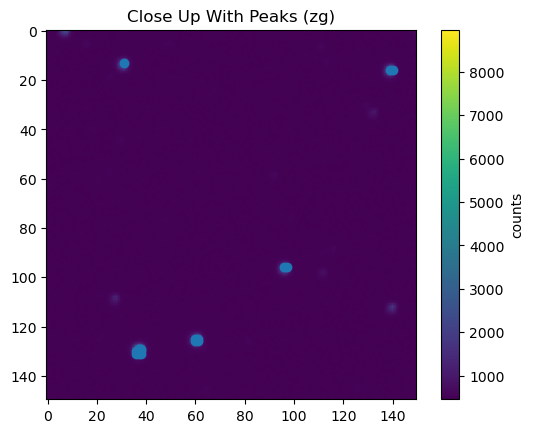

In [12]:
plt_fits(close_upg, 'Close Up With Peaks (zg)')
plt.scatter(data_pksg[1],data_pksg[0], marker= 'o')
plt.show()

In [13]:
def find_centroid(image, guess_x, guess_y, window):
    '''Find the centroid of a bright object in an image based on a (x, y) position guess informed by the output of the peaks function'''
    ndim = image.shape
    boxwidth = int(window/2)
    if (guess_x-boxwidth<=0) or (guess_x+boxwidth>=ndim[1]) or (guess_y-boxwidth<=0) or (guess_y+boxwidth>=ndim[0]):
        raise AssertionError('Peak too close to edge. Try a smaller window or skip.')
    xx, yy = np.meshgrid(np.arange(guess_x-boxwidth,guess_x+boxwidth), np.arange(guess_y-boxwidth,guess_y+boxwidth))
    image_cutout = image[guess_y-boxwidth:guess_y+boxwidth,guess_x- boxwidth:guess_x+boxwidth]
    x_center = np.sum(image_cutout*xx)/np.sum(image_cutout)
    y_center = np.sum(image_cutout*yy)/np.sum(image_cutout)
    return x_center, y_center

(95.50922497089142, 95.52461287906289)


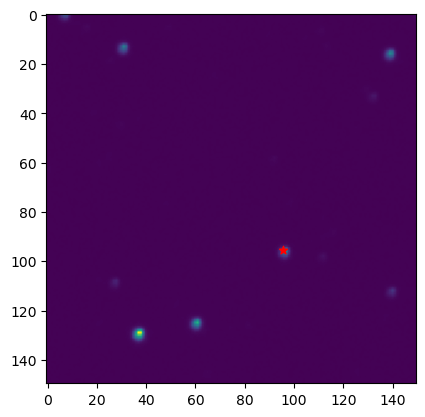

In [14]:
centroidg = find_centroid(zg_data, 96, 96, 50)
print(centroidg)
plt.imshow(close_upg)
plt.scatter(centroidg[1],centroidg[0], marker = '*', color = 'red')
plt.show()

In [15]:
from astropy.modeling.functional_models import Gaussian2D
def gauss2d(x, y, x_std, y_std, x_mean, y_mean):
    '''Fit a 2D gaussian model to a dataset'''
    gauss =  Gaussian2D(x_mean=x_mean, y_mean=y_mean, x_stddev=x_std, y_stddev=y_std)
    g_data = gauss(x,y)
    return g_data / np.sum(g_data)

In [16]:
def find_moment(image, centroid_x, centroid_y, window=5):
    ''' Find the second moment of the 2D gaussian function result to estimate an appropriate aperture width '''
    boxwidth = int(window/2)
    image_cutout = image[int(centroid_x-boxwidth):int(centroid_x+boxwidth),int(centroid_y-boxwidth):int(centroid_y+boxwidth)]
    xx, yy = np.meshgrid(np.arange(centroid_x-boxwidth,centroid_x+boxwidth), np.arange(centroid_y-boxwidth,centroid_y+boxwidth))
    sigma_x = (np.sum(xx**2*image_cutout)/np.sum(image_cutout))-centroid_x**2
    sigma_y = (np.sum(yy**2*image_cutout)/np.sum(image_cutout))-centroid_y**2
    return sigma_x, sigma_y

In [17]:
stddev_xg = find_moment(close_upg, centroidg[1], centroidg[0])[0]
stddev_yg = find_moment(close_upg, centroidg[1], centroidg[0])[1]

In [18]:
def phot(data,centroid_x, centroid_y, sigma_x, sigma_y, window=32):
    '''Define a point spread function and concolve it with a dataset, using a window found in the find_moment function'''
    boxwidth = int(window/2)
    image_cutout = data[int(centroid_x-boxwidth):int(centroid_x+boxwidth),int(centroid_y-boxwidth):int(centroid_y+boxwidth)]
    xvals, yvals = np.meshgrid(np.arange(int(centroid_x-boxwidth),int(centroid_x+boxwidth)), np.arange(int(centroid_y-boxwidth),int(centroid_y+boxwidth)))
    model = gauss2d(xvals, yvals, sigma_x, sigma_y, centroid_x, centroid_y)
    psf_convolve = model * image_cutout
    plt.imshow(image_cutout)
    plt.contour(model)
    psf_flux = np.sum(psf_convolve)
    return model, psf_convolve, psf_flux

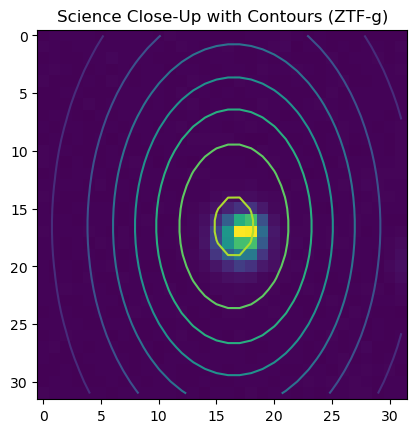

In [178]:
resultg = phot(close_upg, centroidg[0], centroidg[1], stddev_xg, stddev_yg)
plt.title('Science Close-Up with Contours (ZTF-g)')
plt.savefig('green_close_up')

[14.22243022 14.22243022]


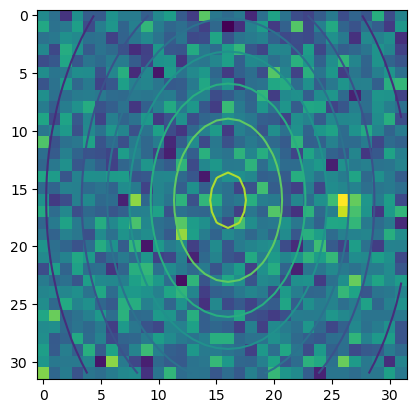

In [20]:
skyg = phot(zg_data, 400, 100, stddev_xg, stddev_yg)
median_skyg = np.median(skyg[1]) * np.array(resultg[1].shape)
print(median_skyg)

In [21]:
net_starg = np.sum(resultg[2]-median_skyg)
print(net_starg)

1126.9814303655296


[array([12.09210867, 12.09210867]), array([10.58007817, 10.58007817]), array([9.54606274, 9.54606274]), array([8.74561665, 8.74561665]), array([8.11624179, 8.11624179]), array([7.6079196, 7.6079196]), array([7.18644207, 7.18644207]), array([6.82775666, 6.82775666]), array([6.51796673, 6.51796673]), array([6.24690271, 6.24690271]), array([6.00708117, 6.00708117]), array([5.79291934, 5.79291934]), array([5.60014315, 5.60014315]), array([5.4254144, 5.4254144]), array([5.26608225, 5.26608225]), array([5.1200107, 5.1200107]), array([4.98545687, 4.98545687]), array([4.86098258, 4.86098258]), array([4.74538913, 4.74538913]), array([4.64811159, 4.64811159])]
[array([2, 2]), array([12, 12]), array([22, 22]), array([32, 32]), array([42, 42]), array([52, 52]), array([62, 62]), array([72, 72]), array([82, 82]), array([92, 92]), array([102, 102]), array([112, 112]), array([122, 122]), array([132, 132]), array([142, 142]), array([152, 152]), array([162, 162]), array([172, 172]), array([182, 182]), a

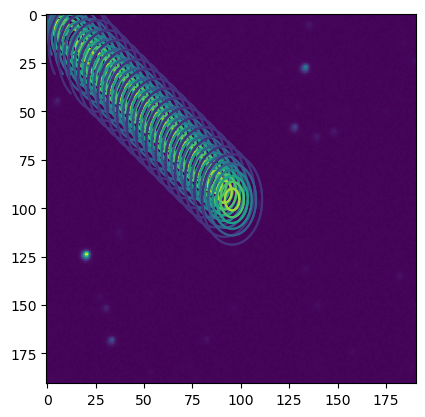

In [89]:
snr_list = []
pixel_numbers = []
g = 6.2
read_noise = 10.3
for i in range(2,200,10):
    aperture_flux = phot(zg_data, centroidg[1], centroidg[0], stddev_xg, stddev_yg, i)[2]
    aperture_net = np.sum(aperture_flux-median_skyg)
    total_pixels = np.array(phot(zg_data, centroidg[1], centroidg[0], stddev_xg, stddev_yg, i)[1].shape)
    snr = aperture_net/np.sqrt(g*aperture_net+total_pixels*g*median_skyg+total_pixels*read_noise**2)
    snr_list.append(snr)
    pixel_numbers.append(total_pixels)
print(snr_list)
print(pixel_numbers)

<function matplotlib.pyplot.show(close=None, block=None)>

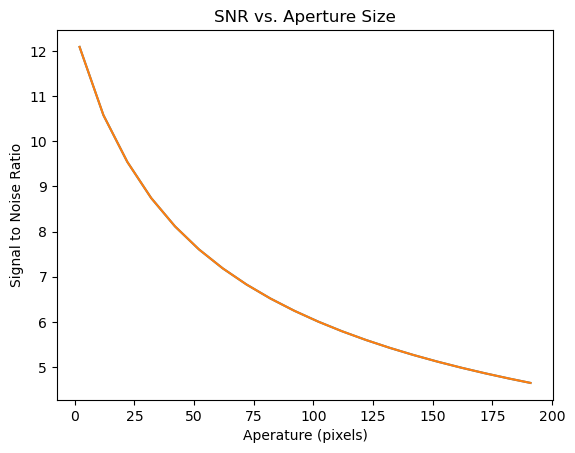

In [185]:
plt.plot(pixel_numbers, snr_list)
plt.title('SNR vs. Aperture Size')
plt.xlabel('Aperature (pixels)')
plt.ylabel('Signal to Noise Ratio')
plt.savefig('snr_curve')
plt.show

In [91]:
t = 30
m_ig = -2.5 * np.log10(net_starg/t)
sigma_m_ig = 1/snr_list[3]
sigma_m_ig = sigma_m_ig[0]
print(m_ig)
print(sigma_m_ig)

-3.936988763439838
0.11434299486358798


SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                  -32                                                  NAXIS   =                    2                                                  NAXIS1  =                  594                                                  NAXIS2  =                  593                                                  BUNIT   = 'Data Value'                                                          ORIGIN  = 'Zwicky Transient Facility' / Data origin                             OBSERVER= 'ZTF Robotic Observing Software' / Observer                           ROBOSOFT= '0.87  April 17, 2018' / Robotic software version                     FITSSOFT= '0.87  April 17, 2018' / FITS software version                        INSTRUME= 'ZTF/MOSAIC'         / Instrument name                                DETECTOR= '        '           / Detector controller                            DETSOFT = '        '           / Detecto

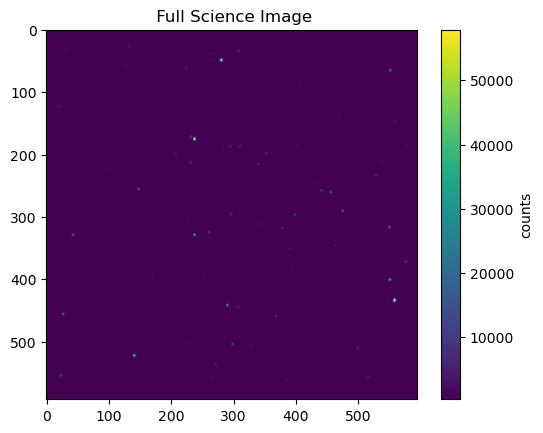

In [92]:
zr_data = load_fits(zr_file)
print(zr_data)
plt_fits(zr_data, ' Full Science Image')

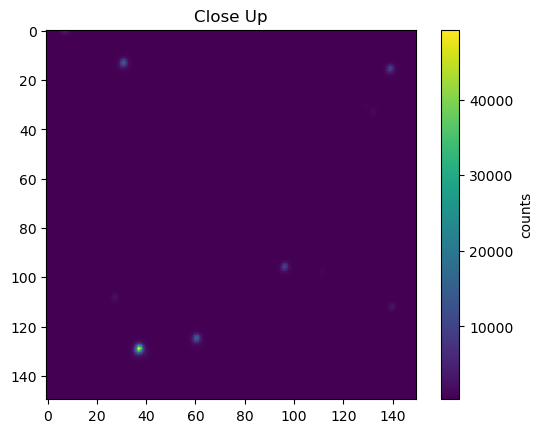

In [93]:
close_up_zr = zr_data[200:350, 200:350]
plt_fits(close_up_zr, 'Close Up')

In [94]:
pks_i_zr = []
pks_j_zr = []
data_pks_zr = peaks(close_up_zr, pks_i_zr, pks_j_zr, 3500)
print(data_pks_zr)

([13, 13, 13, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 17, 17, 96, 96, 96, 97, 97, 112, 125, 125, 125, 125, 126, 126, 126, 126, 129, 129, 129, 129, 130, 130, 130, 130, 130, 131, 131, 131, 131], [30, 31, 32, 30, 31, 32, 30, 31, 139, 140, 138, 139, 140, 138, 139, 95, 96, 97, 96, 97, 140, 59, 60, 61, 62, 59, 60, 61, 62, 36, 37, 38, 39, 35, 36, 37, 38, 39, 36, 37, 38, 39])


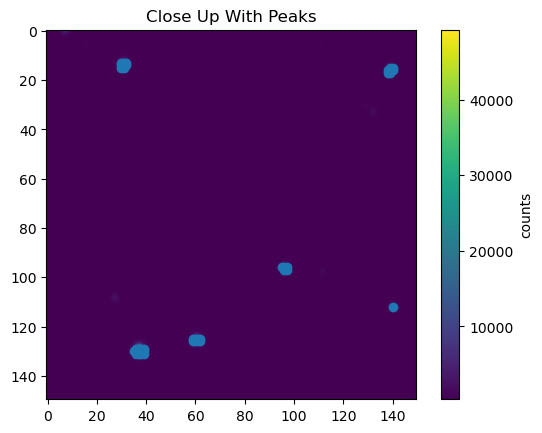

In [95]:
plt_fits(close_up_zr, 'Close Up With Peaks')
plt.scatter(data_pks_zr[1],data_pks_zr[0], marker= 'o')
plt.show()

(95.49724881914167, 95.56203794715944)


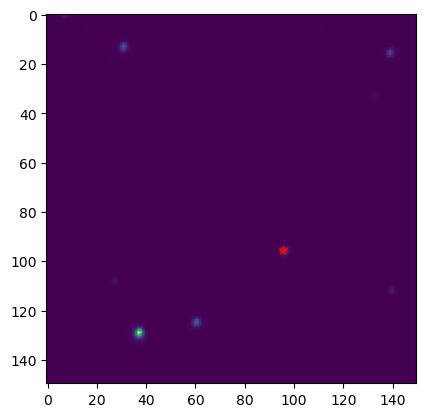

In [96]:
centroid_zr = find_centroid(zr_data, 96, 96, 50)
print(centroid_zr)
plt.imshow(close_up_zr)
plt.scatter(centroid_zr[1],centroid_zr[0], marker = '*', color = 'red')
plt.show()

In [97]:
stddev_x_zr = find_moment(close_up_zr, centroid_zr[1], centroid_zr[0])[0]
stddev_y_zr = find_moment(close_up_zr, centroid_zr[1], centroid_zr[0])[1]

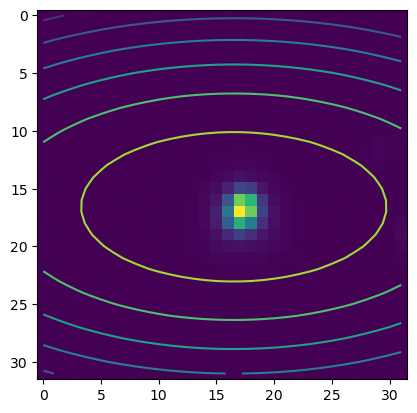

In [98]:
result_zr = phot(close_up_zr, centroid_zr[0], centroid_zr[1], stddev_x_zr, stddev_y_zr)

[12.35293527 12.35293527]


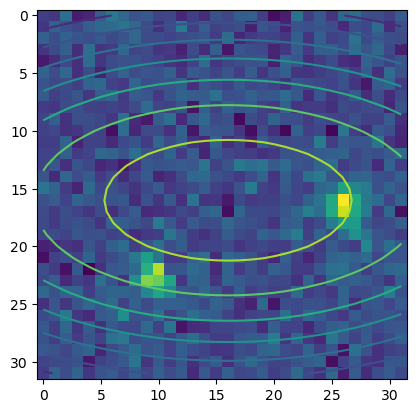

In [99]:
skyr = phot(zr_data, 400, 100, stddev_x_zr, stddev_y_zr)
median_skyr = np.median(skyr[1]) * np.array(result_zr[1].shape)
print(median_skyr)

In [171]:
net_star_zr = np.sum(result_zr[2]-median_skyr)
sigma_m_ir = 1/snr_list[3]
sigma_m_ir = sigma_m_ir[0]
print(net_star_zr)
print(sigma_m_ir)

932.3176284077205
0.11434299486358798


In [101]:
m_i_zr = -2.5 * np.log10(net_star_zr/t)
print(m_i_zr)

-3.7311066032172278


In [102]:
def A(x_i,y_i):
    '''Return the y-intercept parameter value to be used in a least squares fit'''
    A_0 = ((np.sum(x_i**2)*np.sum(y_i)) - (np.sum(x_i)*np.sum(x_i*y_i)))/(len(x_i)*np.sum(x_i**2)-(np.sum(x_i)**2))
    return(A_0)
def B(x_i,y_i): 
    '''Return the slope parameter value to be used in a least squares fit'''
    B_0 = (len(x_i)*np.sum(x_i*y_i) - np.sum(x_i)*np.sum(y_i))/(len(x_i)*np.sum(x_i**2) - (np.sum(x_i))**2)
    return(B_0)
def sigma_y(A,B,x,y):
    '''Return the error in y parameter value to be used in a least squares fit'''
    sigma_y_0 = np.sqrt((1/np.sqrt(len(x)-2))*np.sum((y-(A+(B*x)))**2))
    return(sigma_y_0)

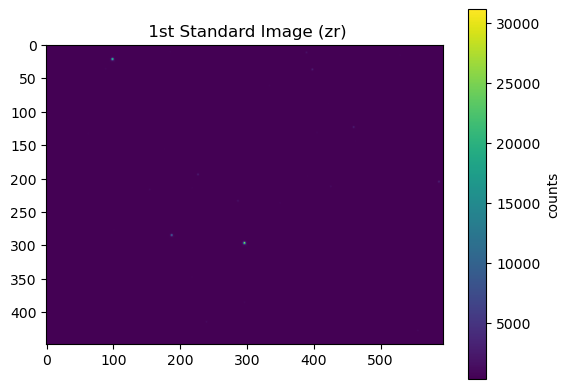

In [103]:
plt_fits(standard_1r, ' 1st Standard Image (zr)')
plt.show()

In [104]:
pks_i_sr1 = []
pks_j_sr1 = []
sr1_data_pks = peaks(standard_1r, pks_i_sr1, pks_j_sr1, 12000)
print(sr1_data_pks)

([22, 22, 22, 23, 296, 296, 297, 297, 298], [98, 99, 100, 99, 296, 297, 296, 297, 296])


(296.4874127693262, 295.76728871177687)


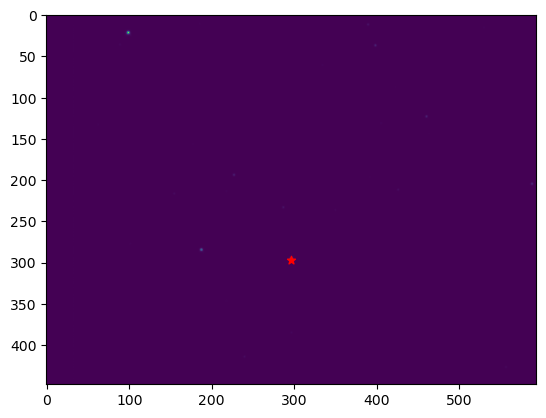

In [105]:
centroid_sr1 = find_centroid(standard_1r, 297, 296, 50)
print(centroid_sr1)
plt.imshow(standard_1r)
plt.scatter(centroid_sr1[1],centroid_sr1[0], marker = '*', color = 'red')
plt.show()

1200.688729327897


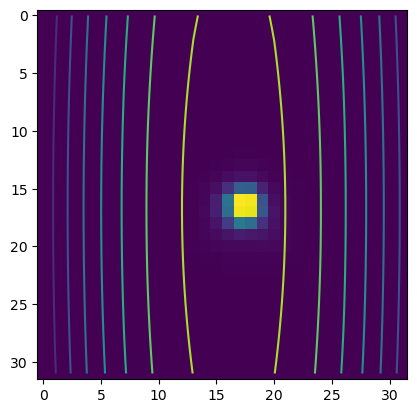

In [106]:
stddev_x_sr1 = find_moment(standard_1r, centroid_sr1[1], centroid_sr1[0])[0]
stddev_y_sr1 = find_moment(standard_1r, centroid_sr1[1], centroid_sr1[0])[1]
result_sr1 = phot(standard_1r, centroid_sr1[0], centroid_sr1[1], stddev_x_sr1, stddev_y_sr1)
net_star_sr1 = np.sum(result_sr1[2]-median_skyr)
print(net_star_sr1)

In [107]:
sr_mi = []
m_i_sr1 = -2.5 * np.log10(net_star_sr1/t)
sigma_m_i_sr1 = 1/snr_list[3]
sigma_m_i_sr1 = sigma_m_i_sr1[0]
print(m_i_sr1)
print(sigma_m_i_sr1)
sr_mi.append(m_i_sr1)

-4.005772948201804
0.11434299486358798


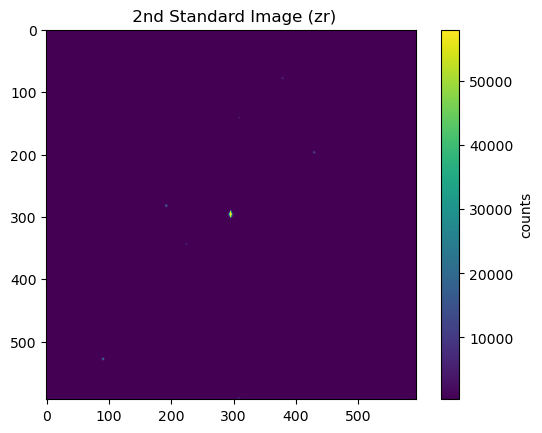

([197, 197, 283, 283, 292, 293, 294, 295, 295, 296, 296, 296, 297, 297, 297, 297, 297, 297, 298, 298, 298, 299, 299, 300, 300, 301, 301, 528, 528, 528, 529], [429, 430, 192, 193, 295, 295, 295, 295, 296, 293, 297, 298, 293, 294, 295, 296, 297, 298, 294, 296, 297, 294, 297, 295, 296, 295, 296, 90, 91, 92, 91])


In [108]:
plt_fits(standard_2r, ' 2nd Standard Image (zr)')
plt.show()
pks_i_sr2 = []
pks_j_sr2 = []
sr2_data_pks = peaks(standard_2r, pks_i_sr2, pks_j_sr2, 15000)
print(sr2_data_pks)

(295.48953625732804, 295.7575803797615)


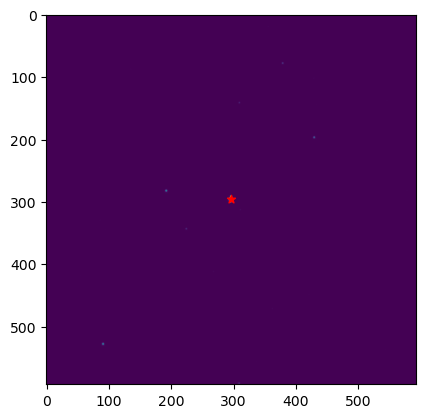

In [109]:
centroid_sr2 = find_centroid(standard_2r, 296, 295, 50)
print(centroid_sr2)
plt.imshow(standard_2r)
plt.scatter(centroid_sr2[1],centroid_sr2[0], marker = '*', color = 'red')
plt.show()

4926.504867316021
-5.538544153707509
0.11434299486358798


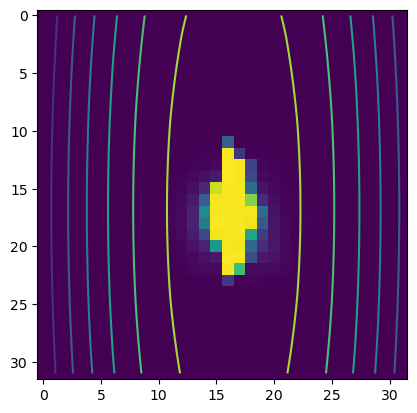

In [110]:
stddev_x_sr2 = find_moment(standard_2r, centroid_sr2[1], centroid_sr2[0])[0]
stddev_y_sr2 = find_moment(standard_2r, centroid_sr2[1], centroid_sr2[0])[1]
result_sr2 = phot(standard_2r, centroid_sr2[0], centroid_sr2[1], stddev_x_sr2, stddev_y_sr2)
net_star_sr2 = np.sum(result_sr2[2]-median_skyr)
print(net_star_sr2)
m_i_sr2 = -2.5 * np.log10(net_star_sr2/t)
sigma_m_i_sr2 = 1/snr_list[3]
sigma_m_i_sr2 = sigma_m_i_sr2[0]
print(m_i_sr2)
print(sigma_m_i_sr2)
sr_mi.append(m_i_sr2)

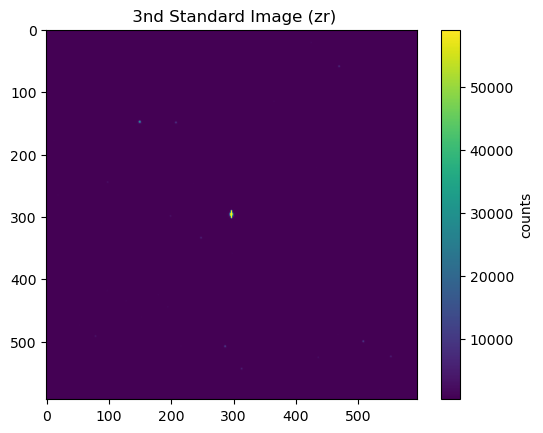

([148, 148, 149, 149, 293, 295, 295, 295, 296, 296, 296, 296, 297, 297, 297, 297, 297, 298, 298, 298, 298, 298, 299, 299, 299, 300, 300, 300, 301, 301, 301, 302, 302, 303], [149, 150, 149, 150, 296, 295, 296, 297, 294, 295, 296, 298, 294, 295, 297, 298, 299, 294, 295, 296, 297, 298, 295, 296, 298, 295, 296, 297, 295, 296, 297, 296, 297, 297])


In [111]:
plt_fits(standard_3r, ' 3nd Standard Image (zr)')
plt.show()
pks_i_sr3 = []
pks_j_sr3 = []
sr3_data_pks = peaks(standard_3r, pks_i_sr3, pks_j_sr3, 15000)
print(sr3_data_pks)

(296.92241212812377, 295.8456437112325)


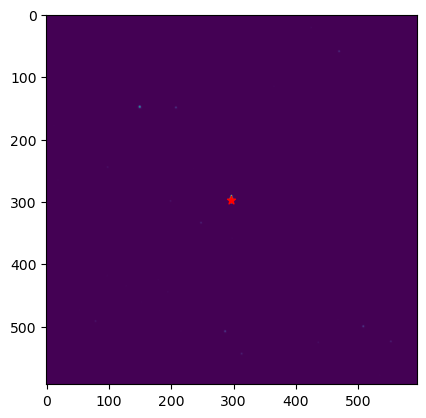

In [112]:
centroid_sr3 = find_centroid(standard_3r, 299, 295, 50)
print(centroid_sr3)
plt.imshow(standard_3r)
plt.scatter(centroid_sr3[1],centroid_sr3[0], marker = '*', color = 'red')
plt.show()

5834.17667724877
-5.7221458051755825
0.11434299486358798


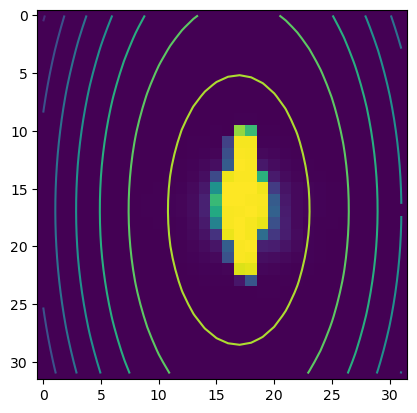

In [113]:
stddev_x_sr3 = find_moment(standard_3r, centroid_sr3[1], centroid_sr3[0])[0]
stddev_y_sr3 = find_moment(standard_3r, centroid_sr3[1], centroid_sr3[0])[1]
result_sr3 = phot(standard_3r, centroid_sr3[0], centroid_sr3[1], stddev_x_sr3, stddev_y_sr3)
net_star_sr3 = np.sum(result_sr3[2]-median_skyr)
print(net_star_sr3)
m_i_sr3 = -2.5 * np.log10(net_star_sr3/t)
sigma_m_i_sr3 = 1/snr_list[3]
sigma_m_i_sr3 = sigma_m_i_sr3[0]
print(m_i_sr3)
print(sigma_m_i_sr3)
sr_mi.append(m_i_sr3)

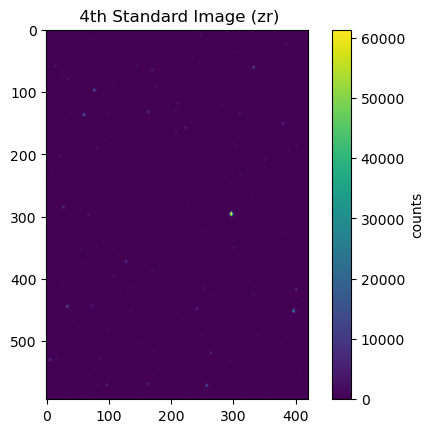

([294, 295, 296, 296, 296, 297, 297, 297, 298, 298, 299, 299], [297, 296, 295, 297, 298, 295, 297, 298, 296, 297, 296, 297])


In [114]:
plt_fits(standard_4r, ' 4th Standard Image (zr)')
plt.show()
pks_i_sr4 = []
pks_j_sr4 = []
sr4_data_pks = peaks(standard_4r, pks_i_sr4, pks_j_sr4, 50000)
print(sr4_data_pks)

(296.53478202097176, 296.1036803149593)


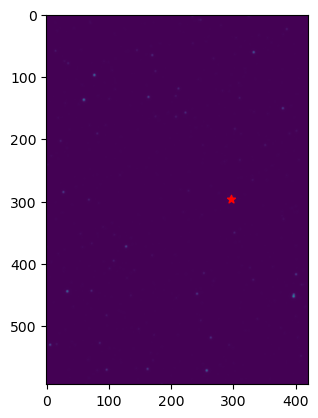

In [115]:
centroid_sr4 = find_centroid(standard_4r, 297, 296, 50)
print(centroid_sr4)
plt.imshow(standard_4r)
plt.scatter(centroid_sr4[1],centroid_sr4[0], marker = '*', color = 'red')
plt.show()

3625.4655218727376
-5.205606311571891
0.11434299486358798


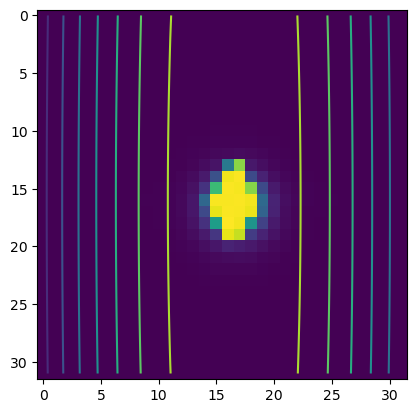

In [116]:
stddev_x_sr4 = find_moment(standard_4r, centroid_sr4[1], centroid_sr4[0])[0]
stddev_y_sr4 = find_moment(standard_4r, centroid_sr4[1], centroid_sr4[0])[1]
result_sr4 = phot(standard_4r, centroid_sr4[0], centroid_sr4[1], stddev_x_sr4, stddev_y_sr4)
net_star_sr4 = np.sum(result_sr4[2]-median_skyr)
print(net_star_sr4)
m_i_sr4 = -2.5 * np.log10(net_star_sr4/t)
sigma_m_i_sr4 = 1/snr_list[3]
sigma_m_i_sr4 = sigma_m_i_sr4[0]
print(m_i_sr4)
print(sigma_m_i_sr4)
sr_mi.append(m_i_sr4)

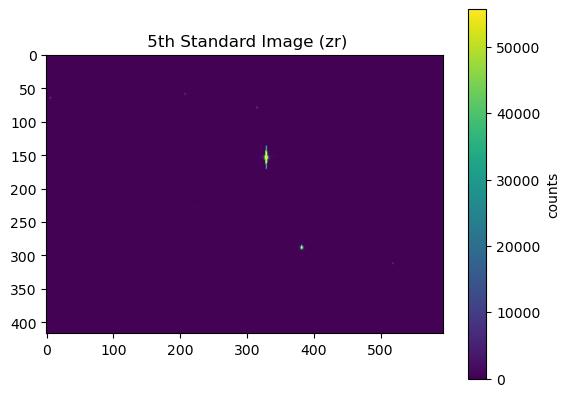

([138, 140, 142, 146, 148, 149, 150, 150, 153, 154, 155, 158, 158, 159, 160, 161, 162, 166, 168, 169, 289], [329, 329, 329, 328, 328, 328, 328, 329, 328, 329, 328, 328, 330, 328, 329, 328, 328, 329, 329, 329, 382])


In [117]:
plt_fits(standard_5r, ' 5th Standard Image (zr)')
plt.show()
pks_i_sr5 = []
pks_j_sr5 = []
sr5_data_pks = peaks(standard_5r, pks_i_sr5, pks_j_sr5, 55000)
print(sr5_data_pks)

(154.64324921794872, 328.6075911540212)


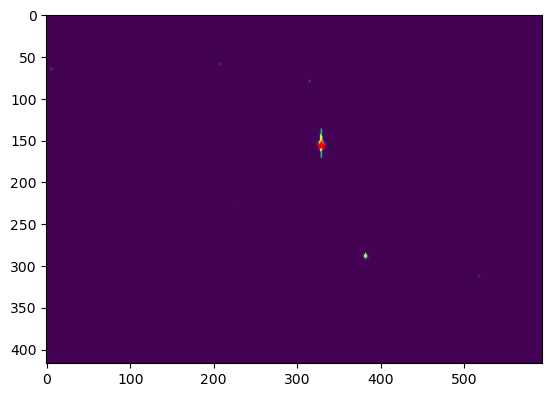

In [118]:
centroid_sr5 = find_centroid(standard_5r, 155, 329, 50)
print(centroid_sr5)
plt.imshow(standard_5r)
plt.scatter(centroid_sr5[1],centroid_sr5[0], marker = '*', color = 'red')
plt.show()

10575.506019462058
-6.367949755139447
0.11434299486358798


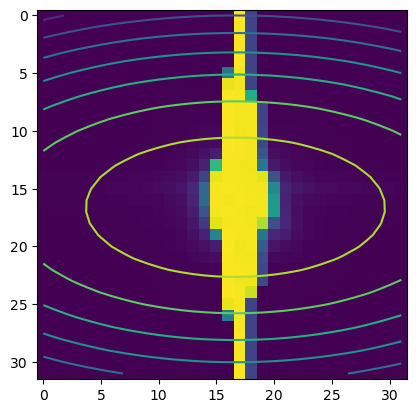

In [119]:
stddev_x_sr5 = find_moment(standard_5r, centroid_sr5[1], centroid_sr5[0])[0]
stddev_y_sr5 = find_moment(standard_5r, centroid_sr5[1], centroid_sr5[0])[1]
result_sr5 = phot(standard_5r, centroid_sr5[0], centroid_sr5[1], stddev_x_sr5, stddev_y_sr5)
net_star_sr5 = np.sum(result_sr5[2]-median_skyr)
print(net_star_sr5)
m_i_sr5 = -2.5 * np.log10(net_star_sr5/t)
sigma_m_i_sr5 = 1/snr_list[3]
sigma_m_i_sr5 = sigma_m_i_sr5[0]
print(m_i_sr5)
print(sigma_m_i_sr5)
sr_mi.append(m_i_sr5)

In [120]:
print(sr_mi)

[-4.005772948201804, -5.538544153707509, -5.7221458051755825, -5.205606311571891, -6.367949755139447]


In [154]:
s_mr = np.array([20.195, 20.2342, 20.2471, 20.4233, 20.8322])
mdiffr = s_mr-sr_mi
Xr = np.array([2.137,2.137,2.137,1.243,1.260])
ZPr = A(Xr, mdiffr)
kr = B(Xr, mdiffr)
sigma_mdiffr = sigma_y(ZPr, kr, Xr, mdiffr)
print(Xr)
print(mdiffr)
print(ZPr)
print(kr)

sigma_ZPr = sigma_mdiffr *np.sqrt(np.sum(Xr**2)/np.abs(2*np.sum(Xr**2)-(np.sum(Xr))**2))
sigma_kr = sigma_mdiffr*np.sqrt(2/np.abs(2*np.sum(Xr**2)-(np.sum(Xr))**2))
print(sigma_ZPr)
print(sigma_kr)

[2.137 2.137 2.137 1.243 1.26 ]
[24.20077295 25.77274415 25.96924581 25.62890631 27.20014976]
27.943932017031756
-1.2281625657798934
0.8171935503973297
0.28168241408310163


<function matplotlib.pyplot.show(close=None, block=None)>

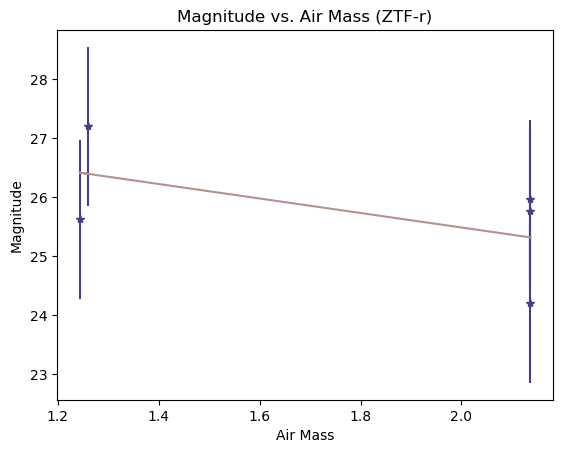

In [146]:
yr = ZPr + kr*Xr
plt.errorbar(Xr, mdiffr, yerr = sigma_mdiffr, fmt = '*', color='darkslateblue')
plt.plot(Xr, yr, color='rosybrown')
plt.title('Magnitude vs. Air Mass (ZTF-r)')
plt.xlabel('Air Mass')
plt.ylabel('Magnitude')
plt.savefig('mag_r')
plt.show

In [169]:
chi_squaredr=np.sum((mdiffr-yr)**2/sigma_mdiffr**2)
r_chi_squaredr=1/3*chi_squaredr
r_chi_squaredr

0.5773502691896255

In [144]:
Xr_real = 1.402
m_realr = m_i_zr + ZPr + kr*Xr_real
print(m_realr)
print(ZPr)
print(kr)

22.490941496591116
27.943932017031756
-1.2281625657798934


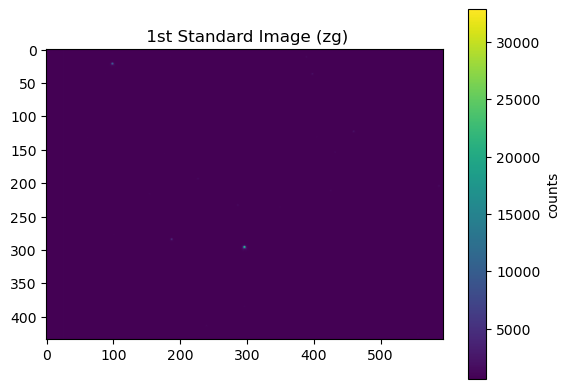

([21, 296, 296], [99, 296, 297])


In [124]:
plt_fits(standard_1g, ' 1st Standard Image (zg)')
plt.show()
pks_i_sg1 = []
pks_j_sg1 = []
sg1_data_pks = peaks(standard_1g, pks_i_sg1, pks_j_sg1, 15000)
print(sg1_data_pks)

(296.49294682240566, 295.587601032002)


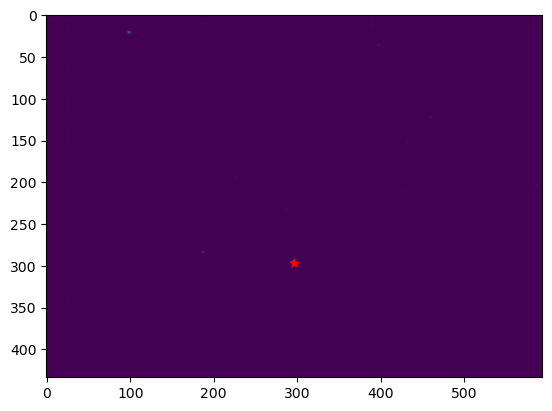

In [125]:
centroid_sg1 = find_centroid(standard_1g, 297, 296, 50)
print(centroid_sg1)
plt.imshow(standard_1g)
plt.scatter(centroid_sg1[1],centroid_sg1[0], marker = '*', color = 'red')
plt.show()

1822.776433647616


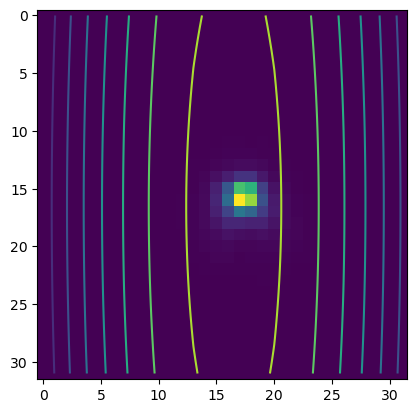

In [126]:
stddev_x_sg1 = find_moment(standard_1g, centroid_sg1[1], centroid_sg1[0])[0]
stddev_y_sg1 = find_moment(standard_1g, centroid_sg1[1], centroid_sg1[0])[1]
result_sg1 = phot(standard_1g, centroid_sg1[0], centroid_sg1[1], stddev_x_sg1, stddev_y_sg1)
net_star_sg1 = np.sum(result_sg1[2]-median_skyg)
print(net_star_sg1)

In [127]:
sg_mi = []
m_i_sg1 = -2.5 * np.log10(net_star_sg1/t)
sigma_m_i_sg1 = 1/snr_list[3]
sigma_m_i_sg1 = sigma_m_i_sg1[0]
print(m_i_sg1)
print(sigma_m_i_sg1)
sg_mi.append(m_i_sg1)

-4.459030375777289
0.11434299486358798


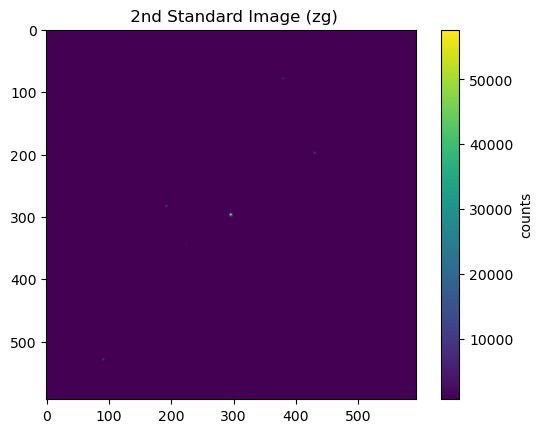

([297, 297, 297, 297, 298, 298, 298, 298], [294, 295, 296, 297, 294, 295, 296, 297])


In [128]:
plt_fits(standard_2g, ' 2nd Standard Image (zg)')
plt.show()
pks_i_sg2 = []
pks_j_sg2 = []
sg2_data_pks = peaks(standard_2g, pks_i_sg2, pks_j_sg2, 15000)
print(sg2_data_pks)

(295.6122667553024, 295.2865786373681)


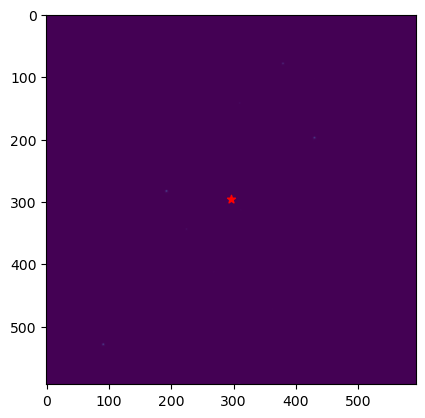

In [129]:
centroid_sg2 = find_centroid(standard_2g, 296, 295, 50)
print(centroid_sg2)
plt.imshow(standard_2g)
plt.scatter(centroid_sg2[1],centroid_sg2[0], marker = '*', color = 'red')
plt.show()

2725.9314898989865
-4.895984204775145
0.11434299486358798


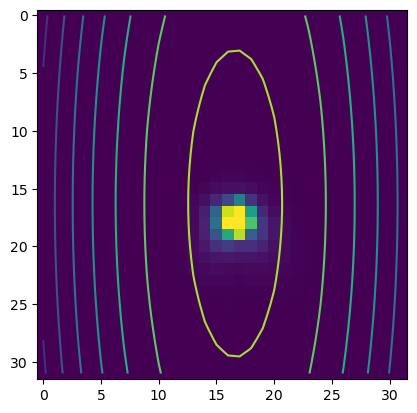

In [130]:
stddev_x_sg2 = find_moment(standard_2g, centroid_sg2[1], centroid_sg2[0])[0]
stddev_y_sg2 = find_moment(standard_2g, centroid_sg2[1], centroid_sg2[0])[1]
result_sg2 = phot(standard_2g, centroid_sg2[0], centroid_sg2[1], stddev_x_sg2, stddev_y_sg2)
net_star_sg2 = np.sum(result_sg2[2]-median_skyg)
print(net_star_sg2)
m_i_sg2 = -2.5 * np.log10(net_star_sg2/t)
sigma_m_i_sg2 = 1/snr_list[3]
sigma_m_i_sg2 = sigma_m_i_sg2[0]
print(m_i_sg2)
print(sigma_m_i_sg2)
sg_mi.append(m_i_sg2)

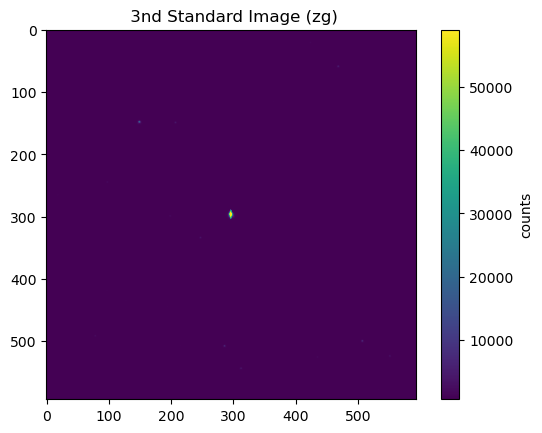

([148, 148, 149, 149, 292, 293, 294, 294, 295, 296, 296, 297, 297, 297, 297, 297, 298, 298, 298, 298, 298, 299, 299, 299, 299, 299, 300, 300, 300, 300, 301, 301, 301, 302, 302, 303, 303, 304], [149, 150, 149, 150, 297, 296, 296, 297, 295, 294, 297, 293, 294, 296, 298, 299, 294, 295, 297, 298, 299, 294, 295, 296, 298, 299, 294, 295, 296, 297, 295, 296, 297, 296, 297, 296, 297, 296])


In [131]:
plt_fits(standard_3g, ' 3nd Standard Image (zg)')
plt.show()
pks_i_sg3 = []
pks_j_sg3 = []
sg3_data_pks = peaks(standard_3g, pks_i_sg3, pks_j_sg3, 15000)
print(sg3_data_pks)

(297.04607760075913, 296.1000184703746)


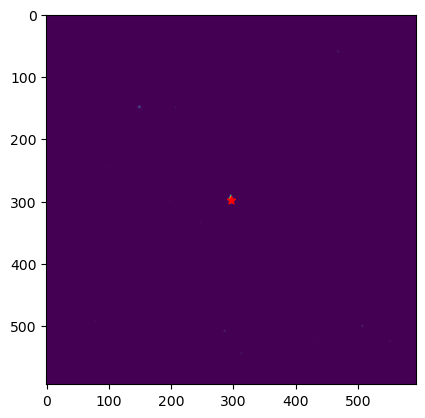

In [132]:
centroid_sg3 = find_centroid(standard_3g, 299, 295, 50)
print(centroid_sg3)
plt.imshow(standard_3g)
plt.scatter(centroid_sg3[1],centroid_sg3[0], marker = '*', color = 'red')
plt.show()

7292.314192522482
-5.964360293581661
0.11434299486358798


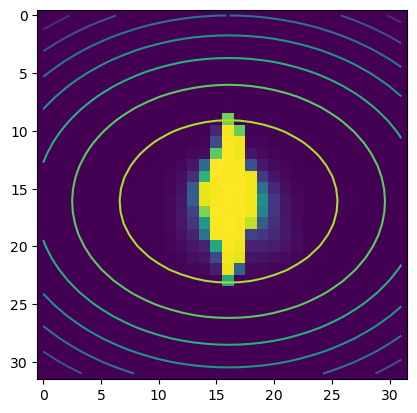

In [133]:
stddev_x_sg3 = find_moment(standard_3g, centroid_sg3[1], centroid_sg3[0])[0]
stddev_y_sg3 = find_moment(standard_3g, centroid_sg3[1], centroid_sg3[0])[1]
result_sg3 = phot(standard_3g, centroid_sg3[0], centroid_sg3[1], stddev_x_sg3, stddev_y_sg3)
net_star_sg3 = np.sum(result_sg3[2]-median_skyg)
print(net_star_sg3)
m_i_sg3 = -2.5 * np.log10(net_star_sg3/t)
sigma_m_i_sg3 = 1/snr_list[3]
sigma_m_i_sg3 = sigma_m_i_sg3[0]
print(m_i_sg3)
print(sigma_m_i_sg3)
sg_mi.append(m_i_sg3)

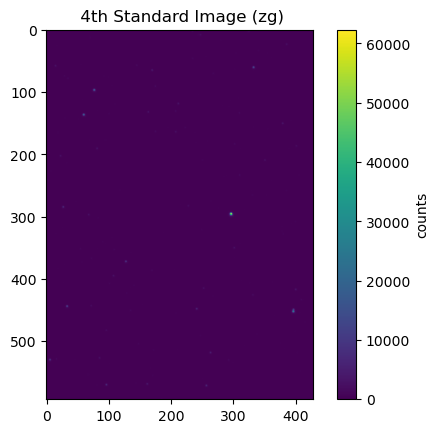

([296, 296, 296, 297, 297], [295, 296, 297, 296, 297])


In [134]:
plt_fits(standard_4g, ' 4th Standard Image (zg)')
plt.show()
pks_i_sg4 = []
pks_j_sg4 = []
sg4_data_pks = peaks(standard_4g, pks_i_sg4, pks_j_sg4, 50000)
print(sg4_data_pks)

(296.32389829719574, 296.19742915726647)


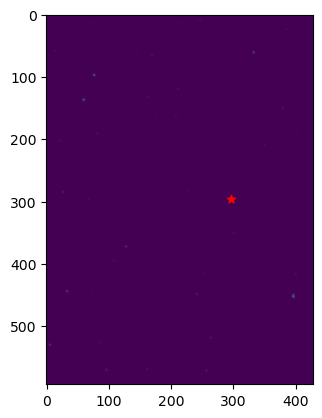

In [135]:
centroid_sg4 = find_centroid(standard_4g, 297, 296, 50)
print(centroid_sg4)
plt.imshow(standard_4g)
plt.scatter(centroid_sg4[1],centroid_sg4[0], marker = '*', color = 'red')
plt.show()

4409.3200429291255
-5.4181259194261475
0.11434299486358798


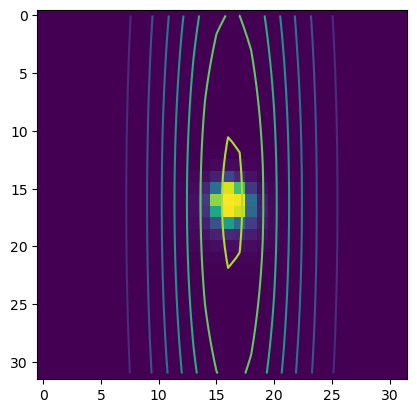

In [136]:
stddev_x_sg4 = find_moment(standard_4g, centroid_sg4[1], centroid_sg4[0])[0]
stddev_y_sg4 = find_moment(standard_4g, centroid_sg4[1], centroid_sg4[0])[1]
result_sg4 = phot(standard_4g, centroid_sg4[0], centroid_sg4[1], stddev_x_sg4, stddev_y_sg4)
net_star_sg4 = np.sum(result_sg4[2]-median_skyg)
print(net_star_sg4)
m_i_sg4 = -2.5 * np.log10(net_star_sg4/t)
sigma_m_i_sg4 = 1/snr_list[3]
sigma_m_i_sg4 = sigma_m_i_sg4[0]
print(m_i_sg4)
print(sigma_m_i_sg4)
sg_mi.append(m_i_sg4)

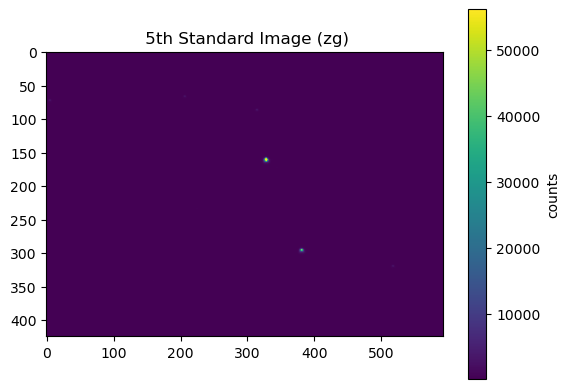

([160, 161, 161, 161, 162, 162, 163, 163, 296], [329, 327, 328, 329, 328, 330, 328, 329, 382])


In [137]:
plt_fits(standard_5g, ' 5th Standard Image (zg)')
plt.show()
pks_i_sg5 = []
pks_j_sg5 = []
sg5_data_pks = peaks(standard_5g, pks_i_sg5, pks_j_sg5, 55000)
print(sg5_data_pks)

(160.49965529915474, 327.6220090046339)


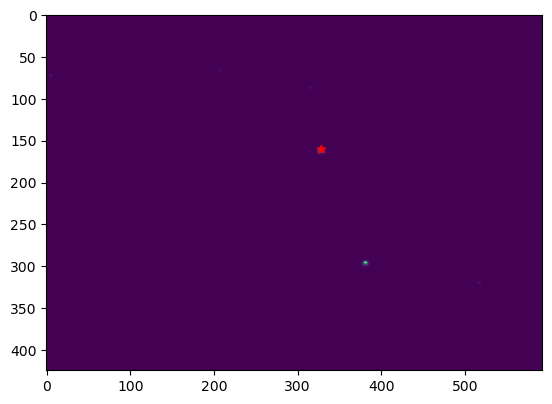

In [138]:
centroid_sg5 = find_centroid(standard_5g, 161, 328, 50)
print(centroid_sg5)
plt.imshow(standard_5g)
plt.scatter(centroid_sg5[1],centroid_sg5[0], marker = '*', color = 'red')
plt.show()

3486.2131154204376
-5.163081694219303
0.11434299486358798


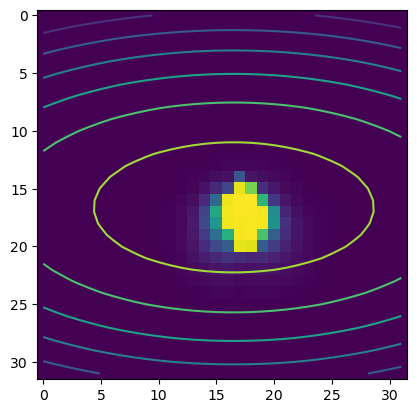

In [139]:
stddev_x_sg5 = find_moment(standard_5g, centroid_sg5[1], centroid_sg5[0])[0]
stddev_y_sg5 = find_moment(standard_5g, centroid_sg5[1], centroid_sg5[0])[1]
result_sg5 = phot(standard_5g, centroid_sg5[0], centroid_sg5[1], stddev_x_sg5, stddev_y_sg5)
net_star_sg5 = np.sum(result_sg5[2]-median_skyg)
print(net_star_sg5)
m_i_sg5 = -2.5 * np.log10(net_star_sg5/t)
sigma_m_i_sg5 = 1/snr_list[3]
sigma_m_i_sg5 = sigma_m_i_sg5[0]
print(m_i_sg5)
print(sigma_m_i_sg5)
sg_mi.append(m_i_sg5)

In [156]:
s_mg = np.array([20.0885, 20.0734, 20.0626, 20.8274, 20.4355])
mdiffg = s_mg - sg_mi
Xg = np.array([1.658,1.658,1.658,1.753,1.227])
ZPg = A(Xg, mdiffg)
kg = B(Xg, mdiffg)
sigma_mdiffg = sigma_y(ZPg, kg, Xg, mdiffg)
print(Xg)
print(mdiffg)
print(ZPg)
print(kg)

sigma_ZPg = sigma_mdiffg *np.sqrt(np.sum(Xg**2)/np.abs(2*np.sum(Xg**2)-(np.sum(Xg))**2))
sigma_kg = sigma_mdiffg*np.sqrt(2/np.abs(2*np.sum(Xg**2)-(np.sum(Xg))**2))
print(sigma_ZPg)
print(sigma_kg)

[1.658 1.658 1.658 1.753 1.227]
[24.54753038 24.9693842  26.02696029 26.24552592 25.59858169]
25.285371563974756
0.12083538696322245
0.6316758777187869
0.2494441498364003


<function matplotlib.pyplot.show(close=None, block=None)>

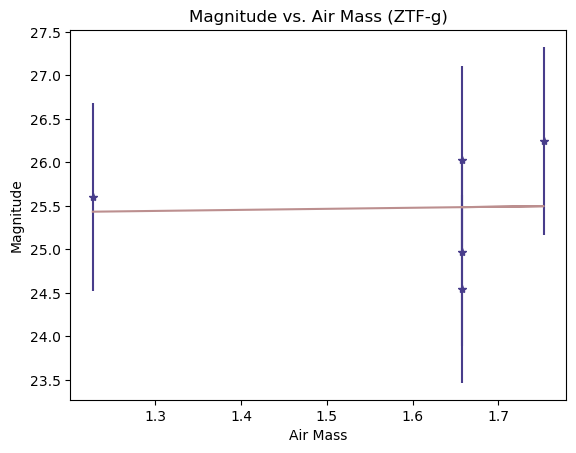

In [159]:
yg = ZPg + kg*Xg
plt.errorbar(Xg, mdiffg, yerr = sigma_mdiffg, fmt = '*', color='darkslateblue')
plt.plot(Xg, yg, color='rosybrown')
plt.title('Magnitude vs. Air Mass (ZTF-g)')
plt.xlabel('Air Mass')
plt.ylabel('Magnitude')
plt.savefig('mag_g')
plt.show

In [170]:
chi_squaredg=np.sum((mdiffg-yg)**2/sigma_mdiffg**2)
r_chi_squaredg=1/(5-2)*chi_squaredg
r_chi_squaredg

0.5773502691896257

In [176]:
Xg_real = 1.575
m_realg = m_ig + ZPg + kg*Xg_real
sigma_m_realg = np.sqrt(sigma_m_ig**2+sigma_ZPg**2+Xg_real**2*sigma_kg**2)
sigma_m_realr = np.sqrt(sigma_m_ir**2+sigma_ZPr**2+Xr_real**2*sigma_kr**2)
print(m_realg)
print(sigma_m_realg)
print(m_realr)
print(sigma_m_realr)

21.53869853500199
0.7526215091248477
22.490941496591116
0.9147898305501533


In [143]:
color = m_realg - m_realr
print(color)
#red

-0.9522429615891248
